In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import nltk
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
#from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#from scipy.sparse import csr_matrix  

In [2]:
path_labeled=r"C:\Users\Efat\Desktop\seneca\semester5\BDM550\week6\labeled_dataset"
files=os.listdir(path_labeled)
print(files)

['arxiv_annotate1_13_1.txt', 'arxiv_annotate1_13_2.txt', 'arxiv_annotate1_13_3.txt', 'arxiv_annotate2_66_1.txt', 'arxiv_annotate2_66_2.txt', 'arxiv_annotate3_80_3.txt', 'arxiv_annotate4_168_1.txt', 'arxiv_annotate4_168_2.txt', 'arxiv_annotate4_168_3.txt', 'arxiv_annotate5_240_1.txt']


In [3]:
documents=[]
for f in files:
    path=os.path.join(path_labeled, f)
#     print(path)
    file=open(path, "r")
    docs=file.readlines()
    #print(docs)
    documents.extend(docs)
print(len(documents))
documents[:10]

335


['### abstract ###\n',
 'MISC\talthough the internet as level topology has been extensively studied over the past few years  little is known about the details of the as taxonomy\n',
 'MISC\tan as  node  can represent a wide variety of organizations  e g   large isp  or small private business  university  with vastly different network characteristics  external connectivity patterns  network growth tendencies  and other properties that we can hardly neglect while working on veracious internet representations in simulation environments\n',
 'AIMX\tin this paper  we introduce a radically new approach based on machine learning techniques to map all the ases in the internet into a natural as taxonomy\n',
 'OWNX\twe successfully classify  NUMBER   NUMBER  percent  of ases with expected accuracy of  NUMBER   NUMBER  percent \n',
 'OWNX\twe release to the community the as level topology dataset augmented with   NUMBER   the as taxonomy information and  NUMBER   the set of as attributes we used 

In [4]:
def preprocess1(docs):   # remove articles
    for item in docs:
        if re.search(r"^### .* ###\s$", item):
            docs.remove(item)
          
preprocess1(documents)
print(len(documents))
documents[:10]

315


['MISC\talthough the internet as level topology has been extensively studied over the past few years  little is known about the details of the as taxonomy\n',
 'MISC\tan as  node  can represent a wide variety of organizations  e g   large isp  or small private business  university  with vastly different network characteristics  external connectivity patterns  network growth tendencies  and other properties that we can hardly neglect while working on veracious internet representations in simulation environments\n',
 'AIMX\tin this paper  we introduce a radically new approach based on machine learning techniques to map all the ases in the internet into a natural as taxonomy\n',
 'OWNX\twe successfully classify  NUMBER   NUMBER  percent  of ases with expected accuracy of  NUMBER   NUMBER  percent \n',
 'OWNX\twe release to the community the as level topology dataset augmented with   NUMBER   the as taxonomy information and  NUMBER   the set of as attributes we used to classify ases\n',
 '

In [5]:
for doc in documents:
    if len(re.findall("NUMBER", doc))>=1:
        print(re.search("NUMBER", doc))
        print(documents.index(doc))

<re.Match object; span=(31, 37), match='NUMBER'>
3
<re.Match object; span=(80, 86), match='NUMBER'>
4
<re.Match object; span=(11, 17), match='NUMBER'>
7
<re.Match object; span=(129, 135), match='NUMBER'>
27
<re.Match object; span=(92, 98), match='NUMBER'>
28
<re.Match object; span=(31, 37), match='NUMBER'>
3
<re.Match object; span=(80, 86), match='NUMBER'>
4
<re.Match object; span=(11, 17), match='NUMBER'>
7
<re.Match object; span=(129, 135), match='NUMBER'>
27
<re.Match object; span=(92, 98), match='NUMBER'>
28
<re.Match object; span=(215, 221), match='NUMBER'>
283


In [6]:
print(documents[0])
print(re.findall("[A-Z]+\s", documents[0])[0][:-1])
re.split("[A-Z]+\s", documents[0])[1]

MISC	although the internet as level topology has been extensively studied over the past few years  little is known about the details of the as taxonomy

MISC


'although the internet as level topology has been extensively studied over the past few years  little is known about the details of the as taxonomy\n'

In [7]:
def preprocess2(docs):   #define documents and labels
    labels=[]
    plain_docs=[]
    pattern="[A-Z]+\s"
    for doc in docs:
        label=re.findall(pattern, doc)[0][:-1]
        d=re.split(pattern, doc)[1]
        labels.append(label)
        plain_docs.append(d)
    return plain_docs, labels
# preprocess2(documents)
docs, labels= preprocess2(documents)
print(set(labels))
print(docs[:3])
print(len(labels) , len(docs))

{'OWNX', 'MISC', 'BASE', 'AIMX', 'CONT'}
['although the internet as level topology has been extensively studied over the past few years  little is known about the details of the as taxonomy\n', 'an as  node  can represent a wide variety of organizations  e g   large isp  or small private business  university  with vastly different network characteristics  external connectivity patterns  network growth tendencies  and other properties that we can hardly neglect while working on veracious internet representations in simulation environments\n', 'in this paper  we introduce a radically new approach based on machine learning techniques to map all the ases in the internet into a natural as taxonomy\n']
315 315


<AxesSubplot:>

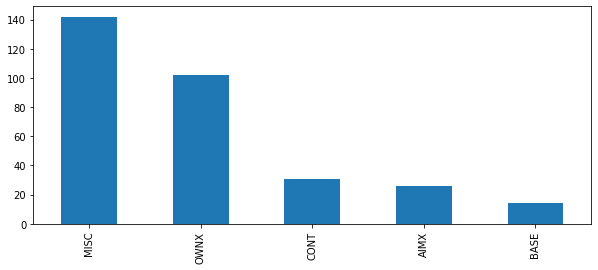

In [8]:
plt.figure(figsize=(10,4))
lbs=pd.Series(labels)
lbs.value_counts().plot(kind='bar')

In [9]:
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')  #used to remove punctuations.\
                                     #it tokenizes only alphanumeric words but not punctuations

def preprocess3(docs):   #remove stop words and punctuations
    cleaned_docs=[]
    for doc in docs:
#         print(doc)
        tokens=[t.lower() for t in tokenizer.tokenize(doc) if (t not in stops) & (len(t)>1)]
        d=" ".join(tokens)
        cleaned_docs.append(d)
    return cleaned_docs
    
docs=preprocess3(docs)
docs[:5]
    

['although internet level topology extensively studied past years little known details taxonomy',
 'node represent wide variety organizations large isp small private business university vastly different network characteristics external connectivity patterns network growth tendencies properties hardly neglect working veracious internet representations simulation environments',
 'paper introduce radically new approach based machine learning techniques map ases internet natural taxonomy',
 'successfully classify',
 'release community level topology dataset augmented']

In [10]:
#vectorizing the documents
vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(docs)
X=X.toarray()
X.shape
type(X)

numpy.ndarray

In [11]:
le=LabelEncoder()
y=le.fit_transform(labels)
y=pd.Series(y)
print(len(y))
print(y)
print(le.classes_)

315
0      3
1      3
2      0
3      4
4      4
      ..
310    4
311    3
312    3
313    3
314    3
Length: 315, dtype: int64
['AIMX' 'BASE' 'CONT' 'MISC' 'OWNX']


In [12]:
print(X.shape[0])
print(y.shape[0])

315
315


In [13]:
# define X and y
X_train, X_test, y_train, y_test= train_test_split(X, y, train_size=0.8, random_state=42)
print(len(X_train))
print(len(X_test))

252
63


In [14]:

X_train[:3]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
from sklearn.naive_bayes import MultinomialNB
model1=MultinomialNB()
model1.fit(X_train, y_train)

MultinomialNB()

In [16]:
from sklearn import metrics
confusion_matrix1 = metrics.confusion_matrix(y_train,model1.predict(X_train))
confusion_matrix1

array([[ 12,   0,   0,   3,   5],
       [  0,   1,   0,   4,   7],
       [  0,   0,   3,  14,   7],
       [  0,   0,   0, 112,   3],
       [  0,   0,   0,   2,  79]], dtype=int64)

In [17]:
print(metrics.classification_report(y_train, model1.predict(X_train), target_names=le.classes_))

              precision    recall  f1-score   support

        AIMX       1.00      0.60      0.75        20
        BASE       1.00      0.08      0.15        12
        CONT       1.00      0.12      0.22        24
        MISC       0.83      0.97      0.90       115
        OWNX       0.78      0.98      0.87        81

    accuracy                           0.82       252
   macro avg       0.92      0.55      0.58       252
weighted avg       0.85      0.82      0.78       252



In [18]:
metrics.accuracy_score(y_train, model1.predict(X_train))

0.8214285714285714

In [19]:
### linear SGD
from sklearn.linear_model import SGDClassifier
model2=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)
model2.fit(X_train, y_train)

SGDClassifier(alpha=0.001, max_iter=5, random_state=42, tol=None)

In [20]:
confusion_matrix2 = metrics.confusion_matrix(y_train,model2.predict(X_train))
confusion_matrix2

array([[ 19,   0,   0,   0,   1],
       [  0,  11,   0,   0,   1],
       [  0,   0,  15,   7,   2],
       [  0,   0,   1, 113,   1],
       [  0,   0,   0,   3,  78]], dtype=int64)

In [21]:
print(metrics.classification_report(y_train, model2.predict(X_train),target_names=le.classes_))

              precision    recall  f1-score   support

        AIMX       1.00      0.95      0.97        20
        BASE       1.00      0.92      0.96        12
        CONT       0.94      0.62      0.75        24
        MISC       0.92      0.98      0.95       115
        OWNX       0.94      0.96      0.95        81

    accuracy                           0.94       252
   macro avg       0.96      0.89      0.92       252
weighted avg       0.94      0.94      0.93       252



In [22]:
metrics.accuracy_score(y_train, model2.predict(X_train))

0.9365079365079365

In [23]:
#comparing the models on the test set
print("naive bayes accuracy: ",metrics.accuracy_score(y_test, model1.predict(X_test)))
print("linear SGD accuracy: ", metrics.accuracy_score(y_test, model2.predict(X_test)))

naive bayes accuracy:  0.7142857142857143
linear SGD accuracy:  0.6507936507936508


In [24]:
print("naive bayes:")
print( metrics.confusion_matrix(y_test,model1.predict(X_test)))
print()
print("SGD:")
print(metrics.confusion_matrix(y_test,model2.predict(X_test)))

naive bayes:
[[ 2  0  0  2  2]
 [ 0  0  0  0  2]
 [ 0  0  0  6  1]
 [ 0  0  0 25  2]
 [ 0  0  0  3 18]]

SGD:
[[ 3  0  0  1  2]
 [ 0  0  0  0  2]
 [ 0  0  0  7  0]
 [ 0  0  1 26  0]
 [ 4  0  1  4 12]]


In [25]:
print("naive bayes:")
print(metrics.classification_report(y_test, model1.predict(X_test),target_names=le.classes_,\
                                   zero_division=0))
print("SGD:")
print(metrics.classification_report(y_test, model2.predict(X_test),target_names=le.classes_,\
                                   zero_division=0))

naive bayes:
              precision    recall  f1-score   support

        AIMX       1.00      0.33      0.50         6
        BASE       0.00      0.00      0.00         2
        CONT       0.00      0.00      0.00         7
        MISC       0.69      0.93      0.79        27
        OWNX       0.72      0.86      0.78        21

    accuracy                           0.71        63
   macro avg       0.48      0.42      0.42        63
weighted avg       0.63      0.71      0.65        63

SGD:
              precision    recall  f1-score   support

        AIMX       0.43      0.50      0.46         6
        BASE       0.00      0.00      0.00         2
        CONT       0.00      0.00      0.00         7
        MISC       0.68      0.96      0.80        27
        OWNX       0.75      0.57      0.65        21

    accuracy                           0.65        63
   macro avg       0.37      0.41      0.38        63
weighted avg       0.58      0.65      0.60        63



In [26]:
y_test.value_counts()

3    27
4    21
2     7
0     6
1     2
dtype: int64

In [27]:
#the complement naive bayes would be a good choice for unbalanced classes
from sklearn.naive_bayes import ComplementNB
model3=ComplementNB()
model3.fit(X_train, y_train)

ComplementNB()

In [28]:
metrics.accuracy_score(y_train, model3.predict(X_train))

0.8849206349206349

In [29]:
metrics.accuracy_score(y_test, model1.predict(X_test))

0.7142857142857143

In [30]:
print(metrics.classification_report(y_train, model3.predict(X_train),target_names=le.classes_,\
                                   zero_division=0))
print(metrics.classification_report(y_test, model3.predict(X_test),target_names=le.classes_,\
                                   zero_division=0))

              precision    recall  f1-score   support

        AIMX       0.70      0.95      0.81        20
        BASE       0.89      0.67      0.76        12
        CONT       0.76      0.67      0.71        24
        MISC       0.94      0.89      0.91       115
        OWNX       0.90      0.96      0.93        81

    accuracy                           0.88       252
   macro avg       0.84      0.83      0.82       252
weighted avg       0.89      0.88      0.88       252

              precision    recall  f1-score   support

        AIMX       0.31      0.67      0.42         6
        BASE       0.00      0.00      0.00         2
        CONT       0.00      0.00      0.00         7
        MISC       0.71      0.56      0.63        27
        OWNX       0.68      0.62      0.65        21

    accuracy                           0.51        63
   macro avg       0.34      0.37      0.34        63
weighted avg       0.56      0.51      0.52        63



In [31]:
print(metrics.confusion_matrix(y_train,model3.predict(X_train)))

[[ 19   0   0   0   1]
 [  0   8   0   0   4]
 [  0   0  16   6   2]
 [  5   1   5 102   2]
 [  3   0   0   0  78]]


In [32]:
print(metrics.confusion_matrix(y_test,model3.predict(X_test)))

[[ 4  0  0  0  2]
 [ 0  0  0  0  2]
 [ 0  0  0  6  1]
 [ 6  1  4 15  1]
 [ 3  1  4  0 13]]


## predicting the labels for unlabled data

In [33]:
# read the unlabled data files
path_unlabeled=r"C:\Users\Efat\Desktop\seneca\semester5\BDM550\week6\unlabeled_dataset"
files_unlabled=os.listdir(path_unlabeled)
print(files_unlabled)

['1.txt', '2.txt']


In [34]:
documents_unlabled=[]
for f in files_unlabled:
    path=os.path.join(path_unlabeled, f)
    file=open(path, "r")
    docs=file.readlines()
    #print(docs)
    documents_unlabled.extend(docs)
print(len(documents_unlabled))
documents_unlabled[:10]

114


['### abstract ###\n',
 'Whole-genome transporter analyses have been conducted on 141 organisms whose complete genome sequences are available.\n',
 'For each organism, the complete set of membrane transport systems was identified with predicted functions, and classified into protein families based on the transporter classification system.\n',
 'Organisms with larger genome sizes generally possessed a relatively greater number of transport systems.\n',
 'In prokaryotes and unicellular eukaryotes, the significant factor in the increase in transporter content with genome size was a greater diversity of transporter types.\n',
 'In contrast, in multicellular eukaryotes, greater number of paralogs in specific transporter families was the more important factor in the increase in transporter content with genome size.\n',
 'Both eukaryotic and prokaryotic intracellular pathogens and endosymbionts exhibited markedly limited transport capabilities.\n',
 'Hierarchical clustering of phylogenetic pr

In [35]:
preprocess1(documents_unlabled)
documents_unlabled[:10]

['Whole-genome transporter analyses have been conducted on 141 organisms whose complete genome sequences are available.\n',
 'For each organism, the complete set of membrane transport systems was identified with predicted functions, and classified into protein families based on the transporter classification system.\n',
 'Organisms with larger genome sizes generally possessed a relatively greater number of transport systems.\n',
 'In prokaryotes and unicellular eukaryotes, the significant factor in the increase in transporter content with genome size was a greater diversity of transporter types.\n',
 'In contrast, in multicellular eukaryotes, greater number of paralogs in specific transporter families was the more important factor in the increase in transporter content with genome size.\n',
 'Both eukaryotic and prokaryotic intracellular pathogens and endosymbionts exhibited markedly limited transport capabilities.\n',
 'Hierarchical clustering of phylogenetic profiles of transporter f

In [36]:
docs_unlabeled=preprocess3(documents_unlabled)
docs_unlabeled[:10]

['whole genome transporter analyses conducted 141 organisms whose complete genome sequences available',
 'for organism complete set membrane transport systems identified predicted functions classified protein families based transporter classification system',
 'organisms larger genome sizes generally possessed relatively greater number transport systems',
 'in prokaryotes unicellular eukaryotes significant factor increase transporter content genome size greater diversity transporter types',
 'in contrast multicellular eukaryotes greater number paralogs specific transporter families important factor increase transporter content genome size',
 'both eukaryotic prokaryotic intracellular pathogens endosymbionts exhibited markedly limited transport capabilities',
 'hierarchical clustering phylogenetic profiles transporter families derived presence absence certain transporter family showed clustering patterns organisms correlated evolutionary history overall physiology lifestyles',
 'membran

In [37]:
#vectorizing the unlabeled documents
vectorizer2 = TfidfVectorizer(vocabulary=vectorizer.get_feature_names()) #max_features=X.shape[1])
X_unlabeled=vectorizer2.fit_transform(docs_unlabeled)
#vectorizer2.get_feature_names()
X_unlabeled=X_unlabeled.toarray()
print(X_unlabeled.shape)
print(X.shape)

(110, 798)
(315, 798)


In [38]:
len(set(vectorizer2.get_feature_names()).intersection(vectorizer.get_feature_names()))

798

the features of the model are exactly the same as features of the vectorized unlabled documents. Now, we can do the prediction.

In [39]:
pred_y=model3.predict(X_unlabeled)
pred_y

array([4, 4, 3, 3, 3, 2, 3, 0, 4, 3, 1, 4, 4, 4, 4, 3, 1, 1, 3, 1, 4, 3,
       3, 4, 3, 3, 3, 4, 2, 0, 0, 3, 3, 0, 3, 3, 0, 3, 3, 0, 2, 4, 4, 1,
       4, 4, 1, 4, 3, 3, 4, 3, 1, 3, 3, 3, 0, 4, 4, 0, 3, 0, 3, 3, 4, 4,
       3, 0, 3, 4, 4, 4, 2, 4, 4, 3, 2, 0, 3, 0, 3, 4, 4, 4, 2, 3, 3, 2,
       4, 4, 3, 4, 4, 0, 4, 4, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4],
      dtype=int64)

In [40]:
le.classes_

array(['AIMX', 'BASE', 'CONT', 'MISC', 'OWNX'], dtype='<U4')

In [41]:
labels_dict=dict(zip([0,1,2,3,4],le.classes_))
labels_dict
pred_labels= map(labels_dict.get, pred_y)
list(pred_labels)[:10]

['OWNX',
 'OWNX',
 'MISC',
 'MISC',
 'MISC',
 'CONT',
 'MISC',
 'AIMX',
 'OWNX',
 'MISC']